# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
df = df_caso('alicia')
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
20310,2870,NaN,M,2,[Proporcione argumentos para justificar su res...,Los criterios técnicos del proyecto y de los u...,Los plazos acordados del proyecto,6,1,entrega de producto defectuoso no cumple con l...,1,2021-10-27T01:26:34.475Z
20311,2870,NaN,M,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,1,se debe recuperar tiempo perdido,1,2021-10-27T01:26:35.637Z
20314,3339,NaN,M,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,3,"Una contexto como es el de pandemia, es algo m...",1,2021-10-27T03:07:50.378Z
20315,3339,NaN,M,2,[Proporcione argumentos para justificar su res...,Los criterios técnicos del proyecto y de los u...,Los plazos acordados del proyecto,6,3,Debiese priorizar cumplir con los criterios té...,1,2021-10-27T03:07:52.002Z
20400,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,4,Lo mejor sería intentar apurar un poco el proy...,1,2021-10-28T15:39:02.170Z


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

[Proporcione argumentos para justificar su respuesta] Continuando la pregunta anterior, Alicia se encuentra ante otro dilema como profesional. Ella podría priorizar entregar el proyecto a tiempo, pero debería realizar modificaciones que podrían no satisfacer del todo los requerimientos técnicos del proyecto y de los usuarios finales, aunque sea técnicamente funcional. Por otro lado, podría priorizar terminarlo con todas sus especificaciones y entregarlo con demora, aunque eso conlleva posibles sanciones contractuales. Por lo tanto, Alicia debería priorizar :
1	Los criterios técnicos del proyecto y de los usuarios
6	Los plazos acordados del proyecto


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('Cantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      9588
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        80
phase           0
time            0
dtype: int64

Cantidad de valores únicos por columna:


user_id       1628
team_id        549
gender           3
df               2
title           32
opt_left         6
opt_right        6
max_num          2
sel              7
comment      11788
phase            8
time         12397
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 12317


## Exploración básica del texto

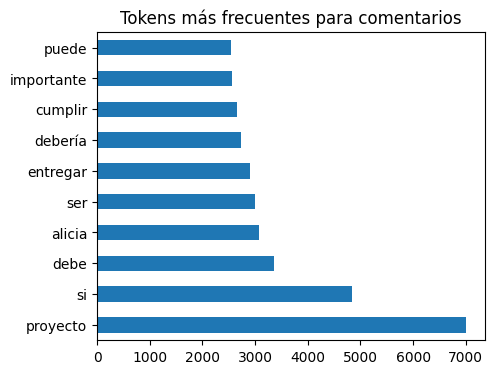

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

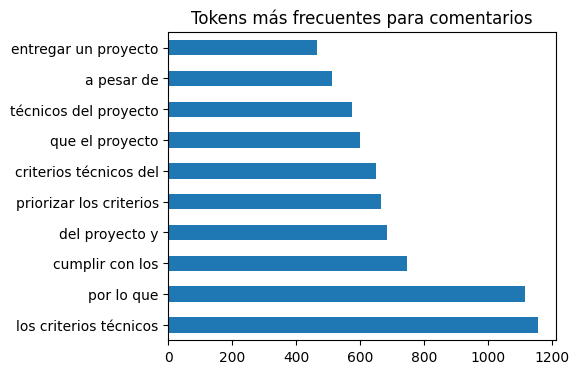

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

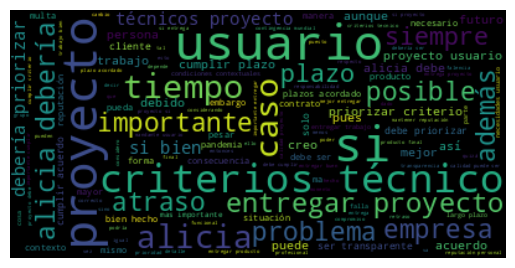

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))